# API Demo
This notebook demonstrates usage of the craterfind API using a minimal python app. The first cell contains the code that will do the necessary things.

In [1]:
import json
import subprocess

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from matplotlib.patches import Circle

def load_image(path='./data/0.png'):
    img = imread(path)
    return img

def prepare_image(img):
    img = img.astype(float).flatten()
    img -= img.mean()
    img /= img.std()
    return img

def prepare_request(array):
    base_url = "http://localhost:8501/v1/models/craters:predict"
    data = {
        "instances":[array.tolist()]
    }
    data_json = json.dumps(data)
    formatted = f"curl -d '{data_json}' -X POST {base_url}"
    return formatted

def make_request(request_string):
    response = subprocess.check_output(request_string, shell=True).decode()
    response_data = eval(response)
    return response_data
    

def plot_prediction(img, prediction):
    x,y,r = prediction
    fig, ax = plt.subplots(1)
    prediction = Circle(xy=(x,y), radius=r, fill=False)
    ax.add_artist(prediction)
    ax.imshow(img, cmap='Greys_r')

# Start with an Image
The model only takes pixels as an input. The annotator-provided crater location is implied to be in the center of the input image. This POC just deals with images of 32x32 pixels, like the following:

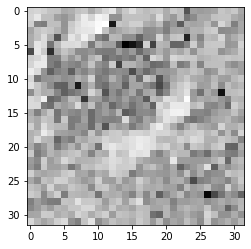

In [5]:
#randomly select an image from test data
n = np.random.randint(100)
#load it
img = load_image(f'./data/{n}.png')
plt.imshow(img, cmap='Greys_r')

# Transform Pixels
The raw pixel data requires two transformations:
 - Flattening: pixels must be flattened into a 1-dimensional array of 1024 values.
 - Normalizing: pixel values must be zero-centered and unit-varianced (subtract the mean pixel value, divide by the standard deviation)

In [6]:
#this function does the transformation
array = prepare_image(img)

#inspect resulting data:
print("Shape of image data: ", array.shape)
print("Mean of image data: ", array.mean())
print("Standard Deviation of image data: ", array.std())

Shape of image data:  (1024,)
Mean of image data:  0.0
Standard Deviation of image data:  1.0


# Form Request
The API can be hit with a POST request and json body. The curl format would be:

`curl -d '{"instances":[[pixels]]}' -X POST http://localhost:<ip>/v1/models/craters:predict`

This is done here:

In [7]:
curl_request = prepare_request(array)
#see what it looks like:
print(curl_request)

curl -d '{"instances": [[1.1139682657498002, 1.2301413422266805, 1.0268384583921402, 0.6492759598422798, 0.5911894216038398, -0.01871922989978083, 0.1264971156963193, 0.5911894216038398, 0.76544903631916, 0.06841057745787925, 0.6492759598422798, 1.3172711495843406, 1.840049993730301, 0.03936730833865923, 0.79449230543838, 1.4915307642996607, 0.7364057671999399, 0.4169298068885196, 0.6783192289614999, 0.79449230543838, 0.06841057745787925, 0.79449230543838, 0.5040596142461797, -2.284094441915958, -0.22202211373432104, -0.33819519021120115, -0.2510653828535411, -0.13489230637666094, 0.7364057671999399, 0.47501634512695967, 0.79449230543838, -0.047762499019000856, 1.2301413422266805, 1.956223070207181, 0.47501634512695967, 0.47501634512695967, -0.2510653828535411, -0.5124550256435362, -0.047762499019000856, 1.0268384583921402, 2.130482684922501, 1.2301413422266805, 2.5951749908300217, 2.130482684922501, -0.5705415638819763, -0.5995848330011962, 0.5621461524846197, 0.5911894216038398, 0.56

# Send Request, Parse Response

In [9]:
response = make_request(curl_request)
#response contains x, y, and r predictions for crater.
print(response)

{'predictions': [[13.937768, 13.9369526, 9.30427647]]}


# Plot Prediction

In [11]:
prediction = response['predictions'][0]
plot_prediction(img, respons)

ValueError: not enough values to unpack (expected 3, got 1)